Found 3200 images belonging to 20 classes.
Found 800 images belonging to 20 classes.
Epoch 1/20
100/100 [==============================] - 265s 3s/step - loss: 2.9639 - accuracy: 0.0694 - val_loss: 3.4802 - val_accuracy: 0.0550
Epoch 2/20
100/100 [==============================] - 261s 3s/step - loss: 2.8749 - accuracy: 0.1009 - val_loss: 2.8489 - val_accuracy: 0.1575
Epoch 3/20
100/100 [==============================] - 260s 3s/step - loss: 2.7947 - accuracy: 0.1369 - val_loss: 2.7912 - val_accuracy: 0.1500
Epoch 4/20
100/100 [==============================] - 260s 3s/step - loss: 2.7125 - accuracy: 0.1700 - val_loss: 2.7301 - val_accuracy: 0.2075
Epoch 5/20
100/100 [==============================] - 260s 3s/step - loss: 2.5991 - accuracy: 0.1984 - val_loss: 2.6184 - val_accuracy: 0.2313
Epoch 6/20
100/100 [==============================] - 259s 3s/step - loss: 2.5335 - accuracy: 0.2250 - val_loss: 2.5321 - val_accuracy: 0.2612
Epoch 7/20
100/100 [==============================] - 260

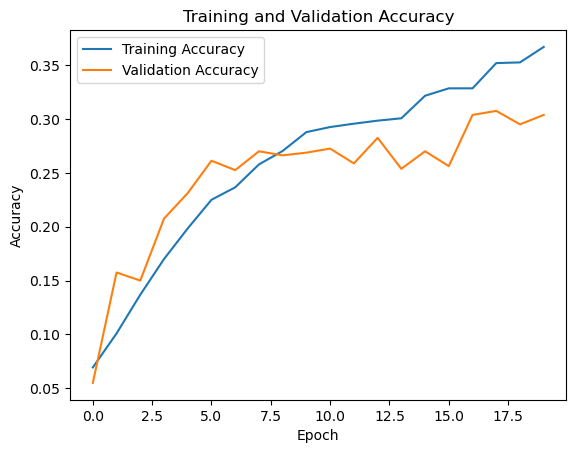

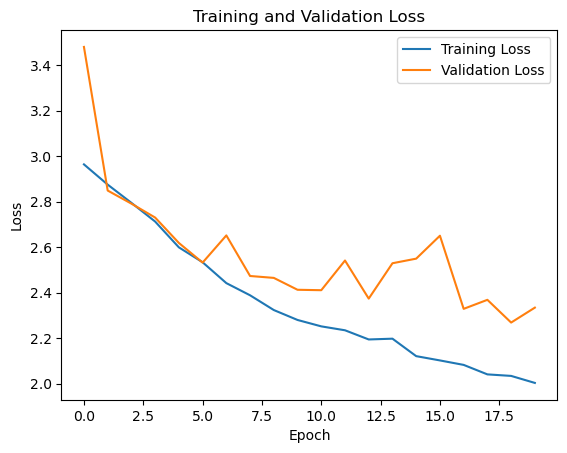

Found 800 images belonging to 20 classes.
25/25 [==============================] - 15s 563ms/step
Confusion Matrix:
[[ 8  5  5  0  0  0  8  0  4  0  0  0  2  2  1  0  0  0  3  2]
 [ 0 31  0  0  0  1  1  0  0  0  0  0  1  0  0  0  2  2  2  0]
 [ 2  1 13  0  0  1  6  0  1  0  0  4  2  0  1  0  2  1  4  2]
 [ 0  7  0 14  0  0  0  2  1  0  1  0  0  8  0  2  0  2  1  2]
 [ 0  6  1  0 12  3  2  3  1  0  2  0  0  5  0  2  1  2  0  0]
 [ 0  5  0  1  1 13  0  8  0  0  0  1  1  5  1  0  2  1  0  1]
 [ 0  6  0  0  0  0 22  0  3  0  0  0  6  0  1  0  1  0  1  0]
 [ 0  3  1  0  0  1  0 24  0  0  0  3  0  1  1  1  2  0  2  1]
 [ 2 14  3  0  0  1  1  1  5  0  0  0  2  0  2  1  0  7  0  1]
 [ 1  4  7  0  2  2  2  2  0  2  1  1  1  1  3  1  1  2  4  3]
 [ 0  7  1  3  2  1  1  3  3  1  2  1  1  7  0  1  1  0  4  1]
 [ 0  1  0  1  0  5  1  2  0  0  0 17  0  2  0  6  0  0  2  3]
 [ 3  2  6  0  0  0  7  0  2  1  0  4  8  0  0  1  2  0  2  2]
 [ 0  2  0  4  1  2  0  3  0  0  2  0  0 20  0  1  2  1  1  1]
 [

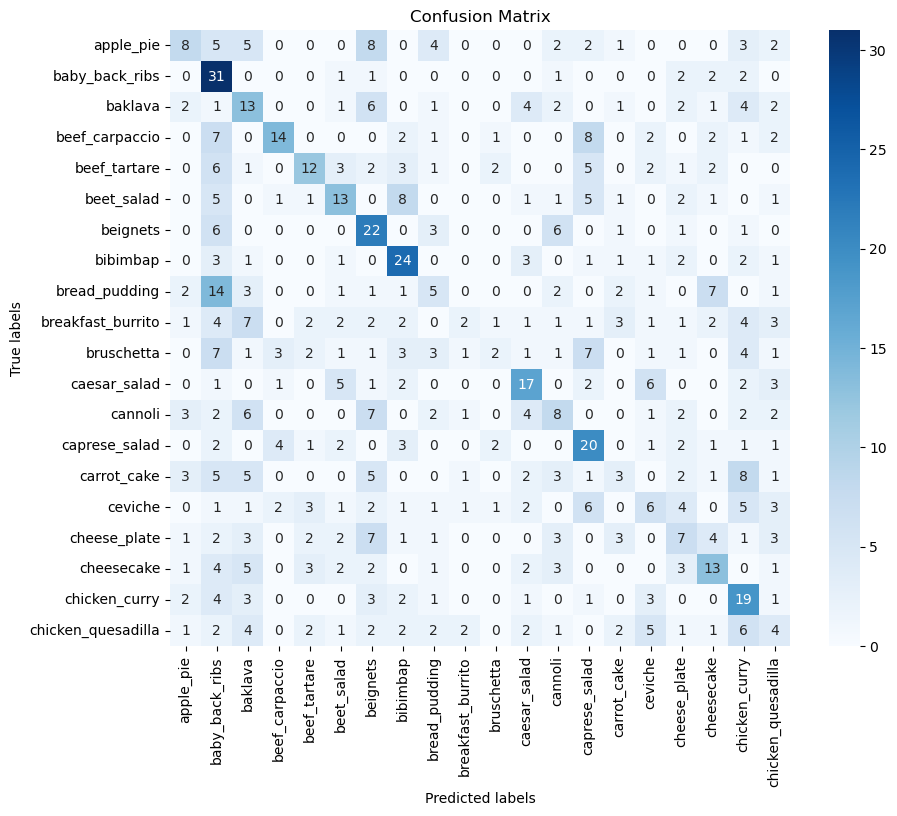

1/1 [==============================] - 0s 213ms/step
Predicted Class: chicken_quesadilla
Calorie Content: 450 calories


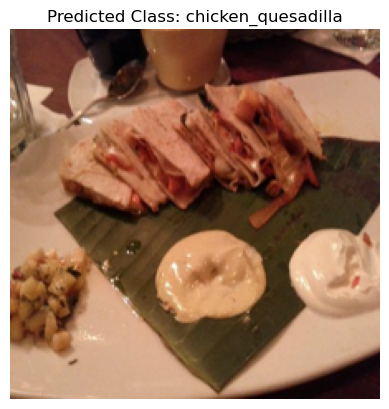

1/1 [==============================] - 0s 64ms/step
Predicted Class: apple_pie
Calorie Content: 300 calories


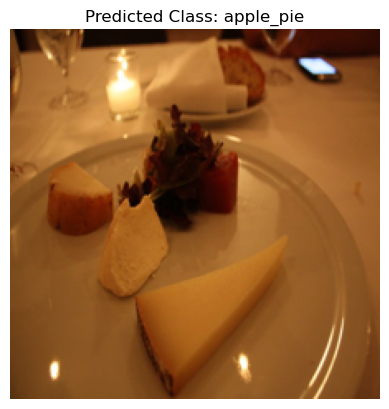

1/1 [==============================] - 0s 63ms/step
Predicted Class: cheese_plate
Calorie Content: 300 calories


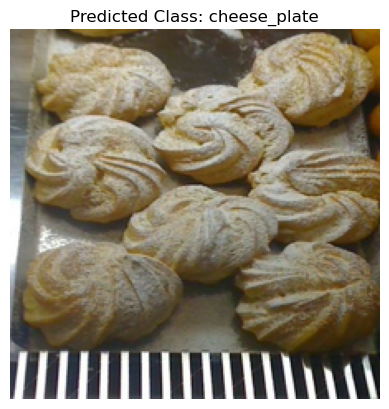

1/1 [==============================] - 0s 62ms/step
Predicted Class: cheese_plate
Calorie Content: 300 calories


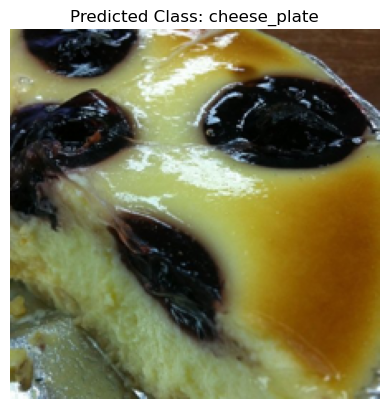

1/1 [==============================] - 0s 65ms/step
Predicted Class: cheesecake
Calorie Content: 400 calories


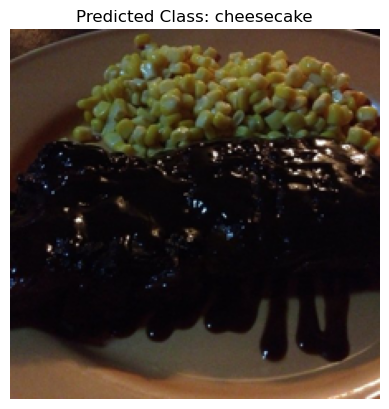

In [5]:
import os
import shutil
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image

# Path to the train and test directories
train_dir = "D:\\train"
test_dir = "D:\\test"

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Calculate num_classes based on the number of directories in train_dir
num_classes = len(os.listdir(train_dir))

# Data augmentation and preprocessing for training
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data preprocessing for validation set
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load and augment training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load validation images
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

print("Training completed!")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Generate predictions for test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Confusion matrix and classification report
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Define the calorie content dictionary
calorie_mapping = {
    "apple_pie": 300,
    "baby_back_ribs": 700,
    "baklava": 400,
    "beef_carpaccio": 250,
    "beef_tartare": 200,
    "beet_salad": 100,
    "beignets": 350,
    "bibimbap": 600,
    "bread_pudding": 400,
    "breakfast_burrito": 700,
    "bruschetta": 150,
    "caesar_salad": 250,
    "cannoli": 200,
    "caprese_salad": 200,
    "carrot_cake": 350,
    "ceviche": 200,
    "cheesecake": 400,
    "cheese_plate": 300,
    "chicken_curry": 400,
    "chicken_quesadilla": 450,
}


# Randomly select some images from the test set and predict their classes
random_indices = np.random.choice(len(test_generator.filenames), size=5, replace=False)
for index in random_indices:
    image_path = os.path.join(test_dir, test_generator.filenames[index])
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    predicted_class = target_names[np.argmax(prediction)]
    
    # Print predicted class and calorie content
    print(f'Predicted Class: {predicted_class}')
    calorie_content = calorie_mapping.get(predicted_class, None)
    if calorie_content is not None:
        print(f'Calorie Content: {calorie_content} calories')
    else:
        print('Calorie content information not available')
    
    plt.imshow(image.squeeze())
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()